# VisMCAO: Actuator Study
The goal of this jupyter notebook is to produce plots of point-spread function (PSF) metrics and wave-front error (WFE) for the acutator count trade study. Refer to Overleaf for most up to date figures. The following plots are currently in this jupyter notebook. Future notebooks will contain actual PSF images as well (work in progress). 
* 10x WFE vs. Time (for each psf location)
* Radius vs. Strehl
* Radius vs. FWHM
* Radius vs. EE80
* Radius vs. WFE
* Actuator vs. PSF Metrics (1000 nm) and WFE (center)

## Setup

In [1]:
import pylab as plt
import numpy as np
from astropy.io import fits
import os, fnmatch
import importlib
import readbin

# Packages specific to MU Lab (all on github)
from paarti.utils import maos_utils
from paarti import psfs, psf_plots
from paarti.psf_metrics import metrics
from bpeck.mcao import act_study

## Parameters 

In [2]:
psf_x = [0, 5, 10, 15, 20, 25, 30, 35, 45, 60]  # arcsec
psf_y = [0, 0,  0,  0,  0,  0,  0,  0,  0,  0]  # arcsec
psf_wvl = [432, 544, 652, 810, 877, 1020, 1248, 1673, 2200] # nanometer

actuators = [2000, 3000, 4000, 5000]

bandpass = 3 # 1000 nanometers
seed = 1

%matplotlib inline

## Get data from directories 
Currently, this notebook can only accept actuator values of 2000, 3000, 4000, 5000 that have the following names:
* 2000actuators, 3000actuators, 4000actuators, 5000actuators

Each of these should be full MAOS directories (folders). As of right now, the actuator study is considering no other actuator count values. Additionally, arrange the repository as:

> act_study1 (or any other name, doesn't matter for this notebook) \
> |── 2000actuators \
> |── 3000actuators \
> |── 4000actuators \
> |── 5000actuators \
> |── A_actuator_study.ipynb (name of this notebook) 

## Output Folder for Subplots

In [3]:
# Name of output folder for all individual subplots
output_folder = 'actuator_study_plots/'

# Creates an output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

### 2000 actuators 

In [53]:
os.chdir("2000actuators") # child directory

In [59]:
#PSF metrics
unsorted_mets_2000 = maos_utils.get_psf_metrics_over_field(seed=seed)
x_2000, y_2000, w_2000, strehl_2000, fwhm_g_2000, fwhm_e_2000, r_ee50_2000, r_ee80_2000 = unsorted_mets_2000
mets_2000 = [arr[np.argsort(arr[:, 0])] for arr in unsorted_mets_2000]
x_2000, y_2000, w_2000, strehl_2000, fwhm_g_2000, fwhm_e_2000, r_ee50_2000, r_ee80_2000 = mets_2000
print(x_2000)


[[ 0  0  0  0  0  0  0  0  0]
 [ 5  5  5  5  5  5  5  5  5]
 [10 10 10 10 10 10 10 10 10]
 [15 15 15 15 15 15 15 15 15]
 [20 20 20 20 20 20 20 20 20]
 [25 25 25 25 25 25 25 25 25]
 [30 30 30 30 30 30 30 30 30]
 [35 35 35 35 35 35 35 35 35]
 [45 45 45 45 45 45 45 45 45]
 [60 60 60 60 60 60 60 60 60]]


In [6]:
#WFE
wfe_2000 = act_study.get_wfe_metrics(seed=seed)
open_mean_nm_2000, clos_mean_nm_2000, open_xx_mean_nm_2000, clos_xx_mean_nm_2000 = wfe_2000
print(

In [7]:
os.chdir("..") # Back to act_study parent directory

### 3000 actuators 

In [8]:
os.chdir("3000actuators")

In [9]:
#PSF metrics
mets_3000 = maos_utils.get_psf_metrics_over_field(seed=seed)
x_3000, y_3000, w_3000, strehl_3000, fwhm_g_3000, fwhm_e_3000, r_ee50_3000, r_ee80_3000 = mets_3000

In [10]:
#WFE
wfe_3000 = act_study.get_wfe_metrics(seed=seed)
open_mean_nm_3000, clos_mean_nm_3000, open_xx_mean_nm_3000, clos_xx_mean_nm_3000 = wfe_3000

In [11]:
os.chdir("..")

### 4000 actuators

In [12]:
os.chdir("4000actuators")

In [13]:
#PSF metrics
mets_4000 = maos_utils.get_psf_metrics_over_field(seed=seed)
x_4000, y_4000, w_4000, strehl_4000, fwhm_g_4000, fwhm_e_4000, r_ee50_4000, r_ee80_4000 = mets_4000

In [14]:
wfe = ["Total WFE", "Tip-Tilt", "High-Order"]
colors = ["r", "g", "b"] # Colors match those presented in MAOS

results_xx_file = f'extra/Resp_{seed}.bin'
results_xx = readbin.readbin(results_xx_file)

open_mean_nm, clos_mean_nm, open_xx_mean_nm, clos_xx_mean_nm = act_study.get_wfe_metrics(seed=1)

n_psf = clos_xx_mean_nm.shape[0]

#### 10x WFE vs. Time (Individual Plots)

In [15]:
# 10x WFE vs. Time (for each psf location) for 4000 actuators

# Loop through each PSF location
for i in range(n_psf):
    clos_psf_results = results_xx[3][i]
    plt.figure(figsize=(8,8))
    
    # Plot WFE vs. Time Step for each type of WFE (total, tip-tilt, high-order)
    for j in range(clos_psf_results.shape[1]):
        plt.plot(np.sqrt(clos_psf_results[:,j])*1.0e9, color=colors[j], label=wfe[j], linewidth=0.5)
        
    plt.xlabel('Time Step (n)')
    plt.ylabel('Wavefront Error (nm)')
    plt.legend(loc='upper right')
    plt.title(f'Radius {psf_x[i]}": WFE vs. Time Step ')

    # Save the subplot in new output folder
    plt.savefig(f'../actuator_study_plots/actuator_4000_wfe_subplot_{i}.png', bbox_inches='tight', transparent=True)
    plt.close() # Prevents plotting figures on top of each other

#### 10x WFE vs. Time (1 Subplot)

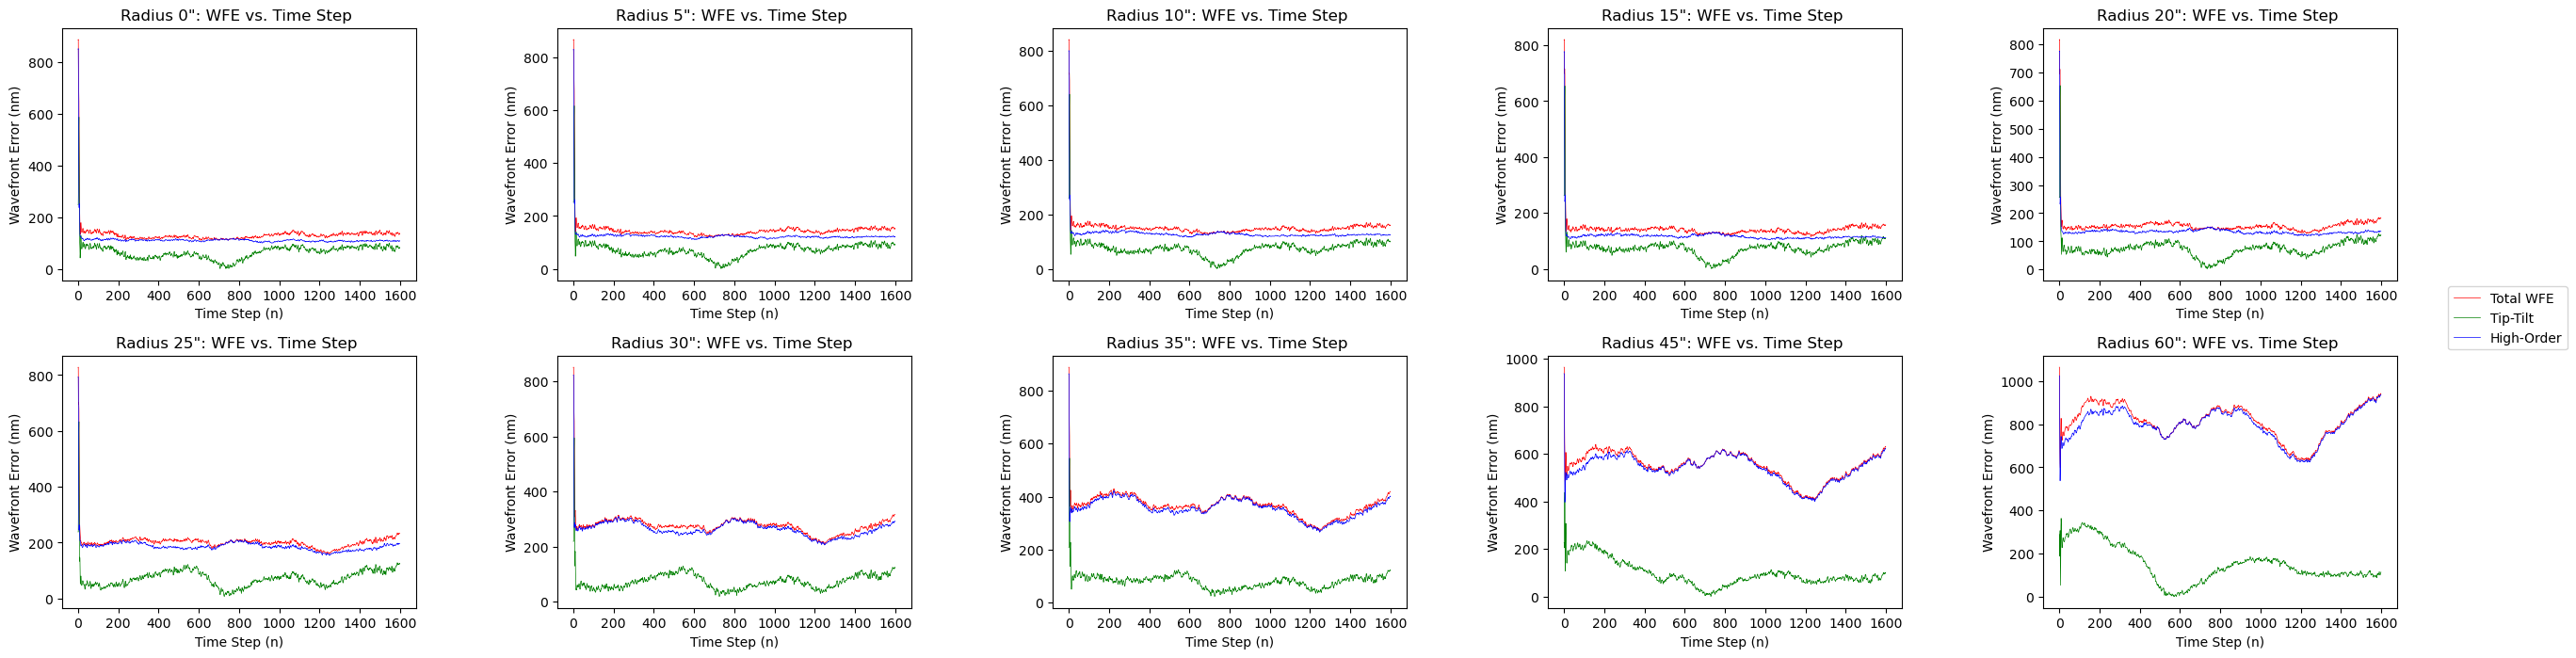

In [16]:
# Create subplots for all PSF locations
fig, ax = plt.subplots(2, n_psf // 2, figsize= (32,8), gridspec_kw={'hspace': 0.3, 'wspace': 0.4})

for i in range(n_psf):
    row_index = i // (n_psf // 2) # Creates two rows
    col_index = (i % (n_psf // 2)) # Creates five columns 
    clos_psf_results = results_xx[3][i]

    # Plot WFE vs. Time Step for each type of WFE (total, tip-tilt, high-order)
    for j in range(clos_psf_results.shape[1]):
        ax[row_index,col_index].plot(np.sqrt(clos_psf_results[:,j])*1.0e9, color=colors[j], label=wfe[j], linewidth=0.5)
        ax[row_index,col_index].set_xlabel('Time Step (n)')
        ax[row_index,col_index].set_ylabel('Wavefront Error (nm)')
        ax[row_index,col_index].set_title(f'Radius {psf_x[i]}": WFE vs. Time Step ')

# Add legend to only the last subplot
ax[-1,-1].legend(loc='upper right', bbox_to_anchor=(1.5, 1.3))

# Save the figure
plt.savefig('../actuator_4000_wfe.png', bbox_inches='tight', transparent=True)

In [17]:
#WFE
wfe_4000 = act_study.get_wfe_metrics(seed=seed)
open_mean_nm_4000, clos_mean_nm_4000, open_xx_mean_nm_4000, clos_xx_mean_nm_4000 = wfe_4000

In [18]:
os.chdir("..")

### 5000 actuators

In [19]:
os.chdir("5000actuators")

In [20]:
#PSF metrics
mets_5000 = maos_utils.get_psf_metrics_over_field(seed=seed)
x_5000, y_5000, w_5000, strehl_5000, fwhm_g_5000, fwhm_e_5000, r_ee50_5000, r_ee80_5000 = mets_5000

In [21]:
#WFE
wfe_5000 = act_study.get_wfe_metrics(seed=seed)
open_mean_nm_5000, clos_mean_nm_5000, open_xx_mean_nm_5000, clos_xx_mean_nm_5000 = wfe_5000

In [22]:
os.chdir("..")

# Results

Adjusted specifically for tip-tilt guide star radius at 30" and laser guide star radius at 15".

In [23]:
# Retrive shape of data for each actuator count
n_wvl_2000 = x_2000.shape[1]
colors_2000 = plt.cm.jet(np.linspace(0,1,n_wvl_2000)) 

n_wvl_3000 = x_3000.shape[1]
colors_3000 = plt.cm.jet(np.linspace(0,1,n_wvl_3000)) 

n_wvl_4000 = x_4000.shape[1]
colors_4000 = plt.cm.jet(np.linspace(0,1,n_wvl_4000)) 

n_wvl_5000 = x_5000.shape[1]
colors_5000 = plt.cm.jet(np.linspace(0,1,n_wvl_5000)) 

### Radius vs. Strehl (Individual Plots)

In [47]:
#Create figure for actuator study
for i in actuators: 
    plt.figure(figsize=(4,4))

    # Iterate over each wavelength for the specific actuator count
    for ww in range(n_wvl_2000):
        label = f'{w_2000[0, ww]*1e3:3.0f} nm'
        x_data = locals()[f'x_{i}'][:, ww] # Science Target Radius
        strehl_data = locals()[f'strehl_{i}'][:, ww]
        color_data = locals()[f'colors_{i}'][ww] # Color for each wavelength
        
        sorted_pairs = sorted(zip(x_data, strehl_data), key=lambda pair: pair[0])
        sorted_x_data, sorted_strehl_data = zip(*sorted_pairs)
        
        plt.plot(sorted_x_data, sorted_strehl_data, color=color_data, label=label)
        
    plt.title(f'{i} Actuators: Science Target Radius (") vs. Strehl')
    plt.xlabel('Science Target Raidus (")')
    plt.ylabel('Strehl Values')
    plt.axvline(30, linestyle='--', color='grey') # Vertical line for Tip-Tilt (TT) and LGS radius
    plt.text(31, 0.81, 'LGS radius', color='grey', ha='left')
    plt.text(31, 0.87, 'TT radius', color='grey', ha='left')

    plt.savefig(f'actuator_study_plots/actuator_strehl_subplot_{i}.png', bbox_inches='tight', transparent=True)
    plt.close()    

### Radius vs. Strehl (1 Subplot)

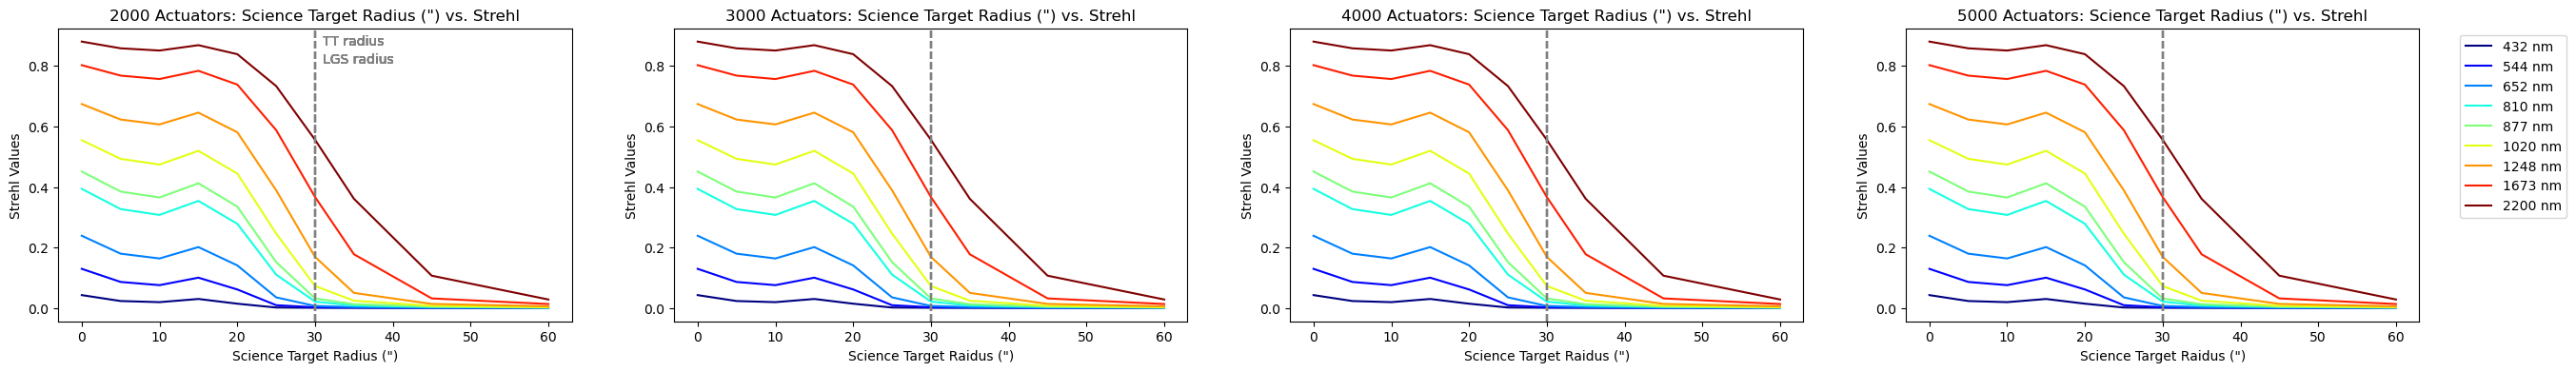

In [43]:
fig, ax = plt.subplots(1, 4, figsize=(32, 4))

# Iterate over each wavelength
for ww in range(n_wvl_2000):
    
    # Define label for the current wavelength
    label = f'{w_2000[0, ww]*1e3:3.0f} nm'

    x_2000_values = x_2000[:, ww]
    y_2000_values = strehl_2000[:, ww]

    sorted_pairs = sorted(zip(x_values, y_values), key=lambda pair: pair[0])
    sorted_x_values, sorted_y_values = zip(*sorted_pairs)

    #2000 actuarors
    ax[0].plot(sorted_x_values, sorted_y_values, color=colors_2000[ww])
    ax[0].set_title('2000 Actuators: Science Target Radius (") vs. Strehl')
    ax[0].set_xlabel('Science Target Radius (")')
    ax[0].set_ylabel('Strehl Values')
    ax[0].axvline(30, linestyle='--', color='grey')
    ax[0].text(31, 0.81, 'LGS radius', color='grey', ha='left')
    ax[0].text(31, 0.87, 'TT radius', color='grey', ha='left')

    #3000 actuators
    ax[1].plot(sorted_x_values, sorted_y_values, color=colors_2000[ww], label=label)
    ax[1].set_xlabel('Science Target Raidus (")')
    ax[1].set_ylabel('Strehl Values')
    ax[1].axvline(30, linestyle='--', color='grey')
    ax[1].set_title('3000 Actuators: Science Target Radius (") vs. Strehl')

    #4000 actuators
    ax[2].plot(sorted_x_values, sorted_y_values, color=colors_2000[ww], label=label)
    ax[2].set_xlabel('Science Target Raidus (")')
    ax[2].set_ylabel('Strehl Values')
    ax[2].axvline(30, linestyle='--', color='grey')
    ax[2].set_title('4000 Actuators: Science Target Radius (") vs. Strehl')

    #5000 actuators
    ax[3].plot(sorted_x_values, sorted_y_values, color=colors_2000[ww], label=label)
    ax[3].set_xlabel('Science Target Raidus (")')
    ax[3].set_ylabel('Strehl Values')
    ax[3].axvline(30, linestyle='--', color='grey')
    ax[3].set_title('5000 Actuators: Science Target Radius (") vs. Strehl')
    ax[3].legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Save the figure
plt.savefig('actuator_strehl.png', bbox_inches='tight', transparent=True)

### Radius vs. FWHM (Individual plots)

In [48]:
# Plotting Radius vs. FWHM for each actuator count
for i in actuators: 
    plt.figure(figsize=(4,4))
    
    for ww in range(n_wvl_2000):
        label = f'{w_2000[0, ww]*1e3:3.0f} nm'
        x_data = locals()[f'x_{i}'][:, ww]
        fwhm_data = locals()[f'fwhm_g_{i}'][:, ww]
        color_data = locals()[f'colors_{i}'][ww]
        
        sorted_pairs = sorted(zip(x_data, fwhm_data), key=lambda pair: pair[0])
        sorted_x_data, sorted_fwhm_data = zip(*sorted_pairs)
        
        plt.plot(sorted_x_data, sorted_fwhm_data, color=color_data, label=label)
        
    plt.title(f'{i} Actuators: Science Target Radius (") vs. FWHM')
    plt.xlabel('Science Target Raidus (")')
    plt.ylabel('Gaussian Full-Width Half Max')
    plt.axvline(30, linestyle='--', color='grey')
    plt.text(29, 270, 'LGS radius', color='grey', ha='right')
    plt.text(29, 290, 'TT radius', color='grey', ha='right')

    plt.savefig(f'actuator_study_plots/actuator_fwhm_subplot_{i}.png', bbox_inches='tight', transparent=True)
    plt.close()  

### Radius vs. FWHM (1 Subplot)

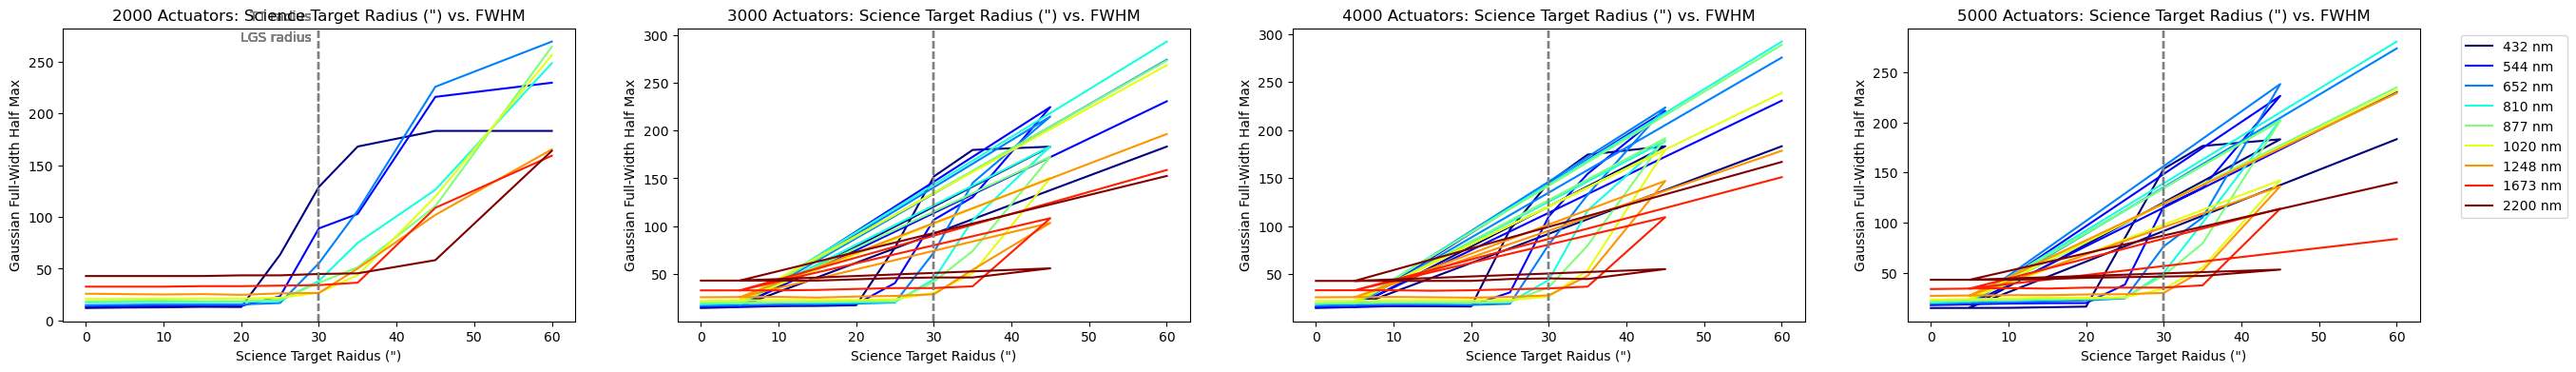

In [51]:
#Create figure for actuator study
fig, ax = plt.subplots(1, 4, figsize=(32, 4))

for ww in range(n_wvl_2000):
    #Define wavelengths 
    label = f'{w_2000[0, ww]*1e3:3.0f} nm'

    fwhm_x_values = x_2000[:, ww]
    fwhm_y_values = fwhm_g_2000[:, ww]

    fwhm_sorted_pairs = sorted(zip(fwhm_x_values, fwhm_y_values), key=lambda pair: pair[0])
    fwhm_sorted_x_values, fwhm_sorted_y_values = zip(*fwhm_sorted_pairs)

    #2000 actuarors
    ax[0].plot(fwhm_sorted_x_values, fwhm_sorted_y_values, color=colors_2000[ww])
    ax[0].set_title('2000 Actuators: Science Target Radius (") vs. FWHM')
    ax[0].set_xlabel('Science Target Raidus (")')
    ax[0].set_ylabel('Gaussian Full-Width Half Max')
    ax[0].axvline(30, linestyle='--', color='grey')
    ax[0].text(29, 270, 'LGS radius', color='grey', ha='right')
    ax[0].text(29, 290, 'TT radius', color='grey', ha='right')

    #3000 actuators
    ax[1].plot(x_3000[:, ww], fwhm_g_3000[:, ww], color=colors_2000[ww], label=label)
    ax[1].set_ylabel('Gaussian Full-Width Half Max')
    ax[1].set_xlabel('Science Target Raidus (")')
    ax[1].axvline(30, linestyle='--', color='grey')
    ax[1].set_title('3000 Actuators: Science Target Radius (") vs. FWHM')

    #4000 actuators
    ax[2].plot(x_4000[:, ww], fwhm_g_4000[:, ww], color=colors_2000[ww], label=label)
    ax[2].set_ylabel('Gaussian Full-Width Half Max')
    ax[2].set_xlabel('Science Target Raidus (")')
    ax[2].axvline(30, linestyle='--', color='grey')
    ax[2].set_title('4000 Actuators: Science Target Radius (") vs. FWHM')

    #5000 actuators
    ax[3].plot(x_5000[:, ww], fwhm_g_5000[:, ww], color=colors_2000[ww], label=label)
    ax[3].set_ylabel('Gaussian Full-Width Half Max')
    ax[3].set_xlabel('Science Target Raidus (")')
    ax[3].axvline(30, linestyle='--', color='grey')
    ax[3].set_title('5000 Actuators: Science Target Radius (") vs. FWHM')
    ax[3].legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    
plt.savefig('actuator_fwhm.png', bbox_inches='tight', transparent=True)

### Radius vs. EE80 (Individual plots)

In [28]:
for i in actuators: 
    plt.figure(figsize=(8,8))
    
    for ww in range(n_wvl_2000):
        label = f'{w_2000[0, ww]*1e3:3.0f} nm'
        x_data = locals()[f'x_{i}'][:, ww]
        r_ee80_data = locals()[f'r_ee80_{i}'][:, ww]
        color_data = locals()[f'colors_{i}'][ww]
        plt.plot(x_data, r_ee80_data, color=color_data, label=label)
        
    plt.title(f'{i} Actuators: Science Target Radius (") vs. EE80')
    plt.xlabel('Science Target Raidus (")')
    plt.ylabel('80% Encircled Energy')
    plt.axvline(30, linestyle='--', color='grey')
    plt.text(29, 305, 'LGS radius', color='grey', ha='right')
    plt.text(29, 315, 'TT radius', color='grey', ha='right')

    plt.savefig(f'actuator_study_plots/actuator_ee80_subplot_{i}.png', bbox_inches='tight', transparent=True)
    plt.close()

### Radius vs. EE80 (1 Subplot)

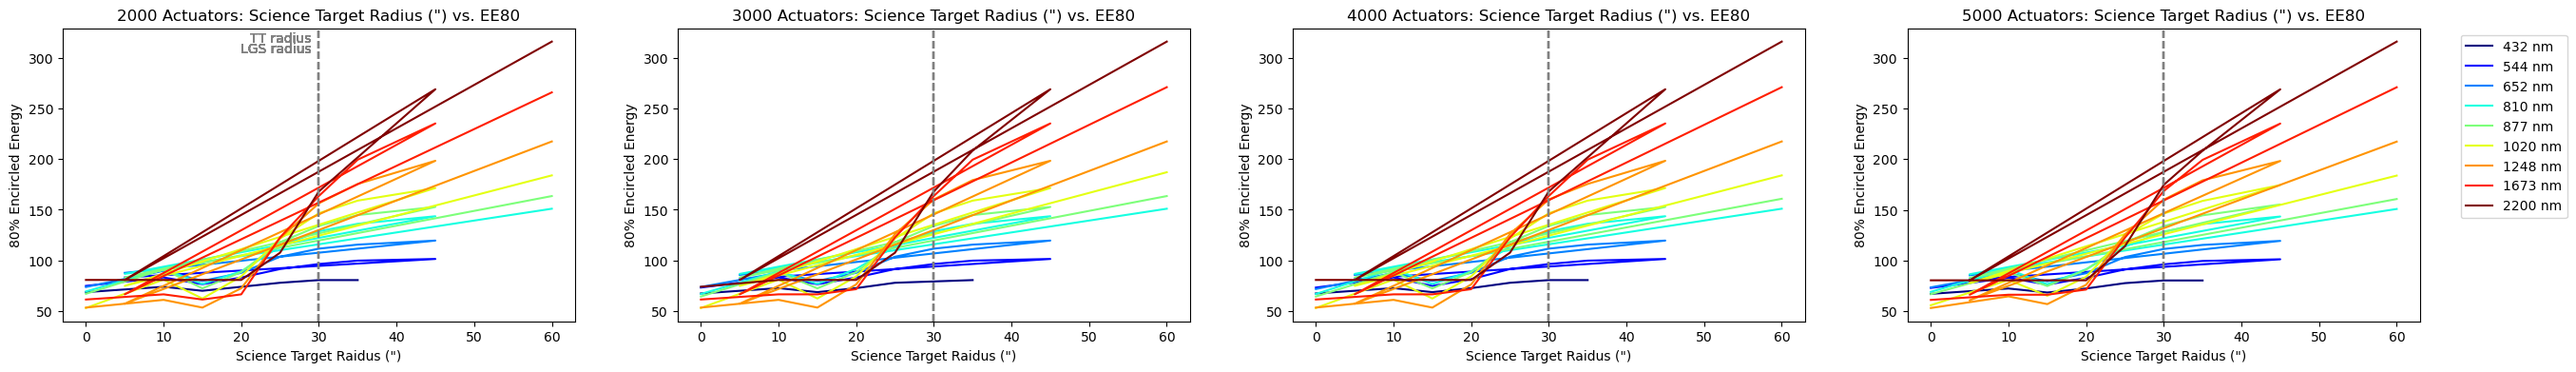

In [29]:
#Create figure for actuator study
fig, ax = plt.subplots(1, 4, figsize=(32, 4))

for ww in range(n_wvl_2000):
    #Define wavelengths 
    label = f'{w_2000[0, ww]*1e3:3.0f} nm'

    #2000 actuarors
    ax[0].plot(x_2000[:, ww], r_ee80_2000[:, ww], color=colors_2000[ww])
    ax[0].set_title('2000 Actuators: Science Target Radius (") vs. EE80')
    ax[0].set_ylabel('80% Encircled Energy')
    ax[0].set_xlabel('Science Target Raidus (")')
    ax[0].axvline(30, linestyle='--', color='grey')
    ax[0].text(29, 305, 'LGS radius', color='grey', ha='right')
    ax[0].text(29, 315, 'TT radius', color='grey', ha='right')

    #3000 actuators
    ax[1].plot(x_3000[:, ww], r_ee80_3000[:, ww], color=colors_2000[ww], label=label)
    ax[1].set_ylabel('80% Encircled Energy')
    ax[1].set_xlabel('Science Target Raidus (")')
    ax[1].axvline(30, linestyle='--', color='grey')
    ax[1].set_title('3000 Actuators: Science Target Radius (") vs. EE80')

    #4000 actuators
    ax[2].plot(x_4000[:, ww], r_ee80_4000[:, ww], color=colors_2000[ww], label=label)
    ax[2].set_ylabel('80% Encircled Energy')
    ax[2].set_xlabel('Science Target Raidus (")')
    ax[2].axvline(30, linestyle='--', color='grey')
    ax[2].set_title('4000 Actuators: Science Target Radius (") vs. EE80')

    #5000 actuators
    ax[3].plot(x_5000[:, ww], r_ee80_5000[:, ww], color=colors_2000[ww], label=label)
    ax[3].set_ylabel('80% Encircled Energy')
    ax[3].set_xlabel('Science Target Raidus (")')
    ax[3].axvline(30, linestyle='--', color='grey')
    ax[3].set_title('5000 Actuators: Science Target Radius (") vs. EE80')
    ax[3].legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.savefig('actuator_ee80.png', bbox_inches='tight', transparent=True)

### Radius vs. WFE (Individual plots)

In [30]:
# Define colors for wavefront error 
wfe = ["Total WFE", "Tip-Tilt", "High-Order"]
colors_wfe = ["r", "g", "b"]

for i in actuators: 
    plt.figure(figsize=(8,8))
    
    for j, color in enumerate(colors_wfe):
        clos_data = locals()[f'clos_xx_mean_nm_{i}'][:, j]
        plt.plot(x_data, clos_data, color=colors_wfe[j], label=wfe[j])
        
    plt.title(f'{i} Actuators: Science Target Radius (") vs. EE80')
    plt.xlabel('Science Target Raidus (")')
    plt.ylabel('Wave-front Error (nm)')
    plt.axvline(30, linestyle='--', color='grey')
    plt.text(29, 770, 'LGS radius', color='grey', ha='right')
    plt.text(29, 790, 'TT radius', color='grey', ha='right')

    plt.savefig(f'actuator_study_plots/actuator_wfe_subplot_{i}.png', bbox_inches='tight', transparent=True)
    plt.close()

### Radius vs. WFE (1 Subplot)

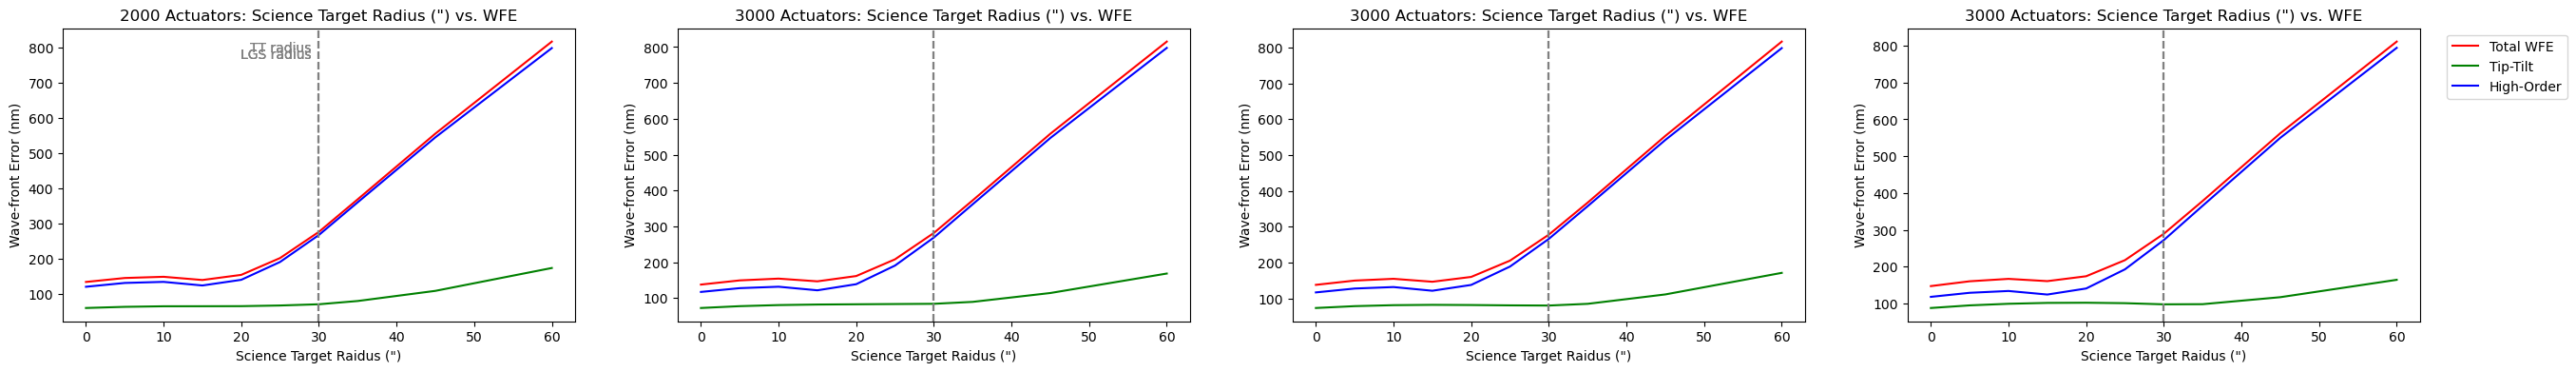

In [31]:
#Create figure for actuator study
fig, ax = plt.subplots(1, 4, figsize=(32, 4))

clos_xx_mean_nm_2000[0,0]

for i,c in enumerate(colors_wfe):
    
    #2000 actuarors
    ax[0].plot(psf_x, clos_xx_mean_nm_2000[:,i], color=colors_wfe[i])
    ax[0].set_title('2000 Actuators: Science Target Radius (") vs. WFE')
    ax[0].set_ylabel('Wave-front Error (nm)')
    ax[0].set_xlabel('Science Target Raidus (")')
    ax[0].axvline(30, linestyle='--', color='grey')
    ax[0].text(29, 770, 'LGS radius', color='grey', ha='right')
    ax[0].text(29, 790, 'TT radius', color='grey', ha='right')

    #3000 actuarors
    ax[1].plot(psf_x, clos_xx_mean_nm_3000[:,i], color=colors_wfe[i])
    ax[1].set_title('3000 Actuators: Science Target Radius (") vs. WFE')
    ax[1].set_ylabel('Wave-front Error (nm)')
    ax[1].set_xlabel('Science Target Raidus (")')
    ax[1].axvline(30, linestyle='--', color='grey')

    #4000 actuarors
    ax[2].plot(psf_x, clos_xx_mean_nm_4000[:,i], color=colors_wfe[i])
    ax[2].set_title('3000 Actuators: Science Target Radius (") vs. WFE')
    ax[2].set_ylabel('Wave-front Error (nm)')
    ax[2].set_xlabel('Science Target Raidus (")')
    ax[2].axvline(30, linestyle='--', color='grey')

    #5000 actuarors
    ax[3].plot(psf_x, clos_xx_mean_nm_5000[:,i], color=colors_wfe[i], label=wfe[i])
    ax[3].set_title('3000 Actuators: Science Target Radius (") vs. WFE')
    ax[3].set_ylabel('Wave-front Error (nm)')
    ax[3].set_xlabel('Science Target Raidus (")')
    ax[3].axvline(30, linestyle='--', color='grey')
    ax[3].legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.savefig('actuator_wfe.png', bbox_inches='tight', transparent=True)

### Actuator vs. PSF Metrics (1000 nm) and WFE (center)

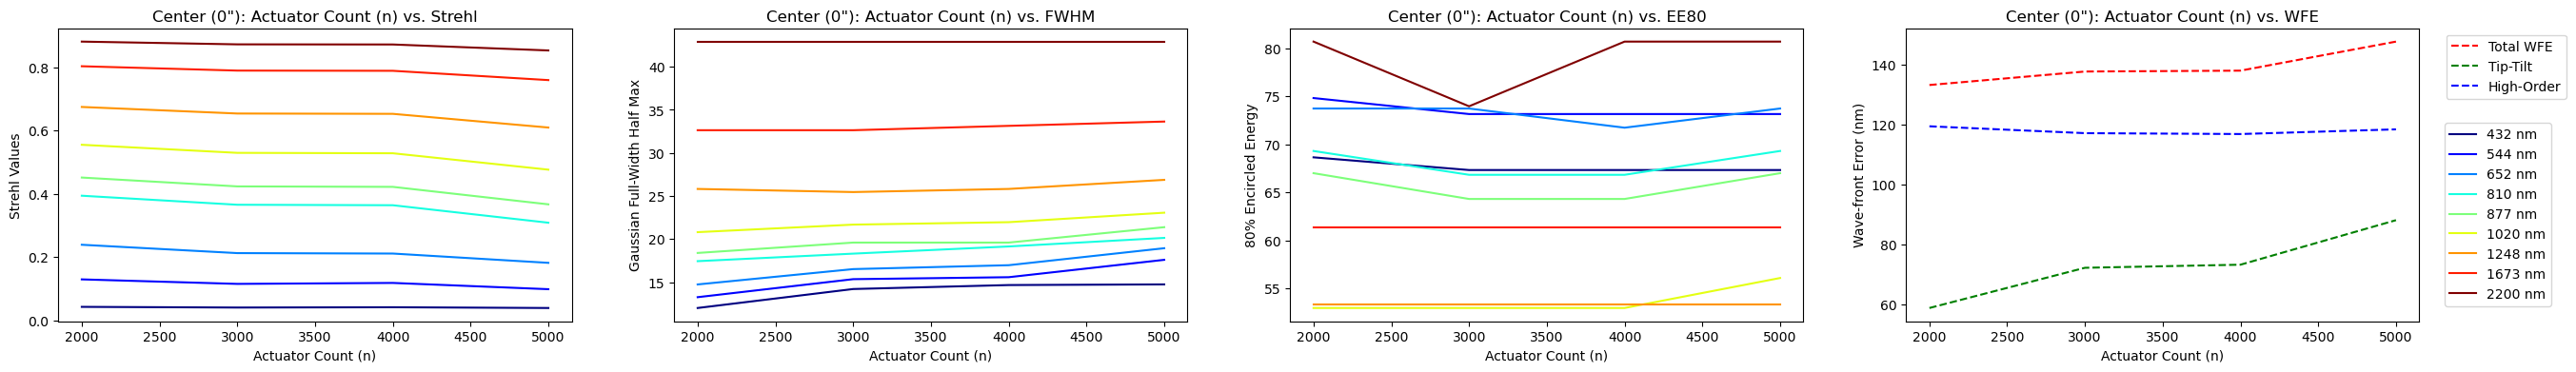

In [32]:
#Create separate lists

metrics = ["strehls", "fwhm", "ee80"]
metric_labels = ["Strehl Values", "Gaussian Full-Width Half Max", "80% Encircled Energy"] 

act_strehls = []
act_fwhm = []
act_ee80 = []
act_wfe = []

actuator = [2000, 3000, 4000, 5000]
wfe_colors = ["r", "g", "b"]
wfe_labels = ["Total WFE", "Tip-Tilt", "High-Order"]

for strehl2000, strehl3000, strehl4000, strehl5000 in zip(strehl_2000[0], strehl_3000[0], strehl_4000[0], strehl_5000[0]):
    act_strehls.append([strehl2000, strehl3000, strehl4000, strehl5000])

for fwhm2000, fwhm3000, fwhm4000, fwhm5000 in zip(fwhm_g_2000[0], fwhm_g_3000[0], fwhm_g_4000[0], fwhm_g_5000[0]):
    act_fwhm.append([fwhm2000, fwhm3000, fwhm4000, fwhm5000])

for ee802000, ee803000, ee804000, ee805000 in zip(r_ee80_2000[0], r_ee80_3000[0], r_ee80_4000[0], r_ee80_5000[0]):
    act_ee80.append([ee802000, ee803000, ee804000, ee805000])

for wfe2000, wfe3000, wfe4000, wfe5000 in zip(clos_xx_mean_nm_2000[0], clos_xx_mean_nm_3000[0], clos_xx_mean_nm_4000[0], clos_xx_mean_nm_5000[0]):
    act_wfe.append([wfe2000, wfe3000, wfe4000, wfe5000])

n_wvls = len(act_strehls)
colors = plt.cm.jet(np.linspace(0, 1, n_wvls))

n_wfe = len(act_wfe)

for i, metric in enumerate(metrics): 
    plt.figure(figsize=(8,8))
    
    for j in range(n_wvls):
        labels_psf = f'{w_2000[0, j]*1e3:3.0f} nm'
        metric_data = locals()[f'act_{metric}'][j]
        plt.plot(actuator, metric_data, color=colors[j], label=labels_psf)
        
    plt.title(f'Center (0"): Actuator Count (n) vs. {metric}')
    plt.xlabel('Actuator Count (n)')
    plt.ylabel(f'{metric}')
    plt.legend()

    plt.savefig(f'actuator_study_plots/actuator_{metric}.png', bbox_inches='tight', transparent=True)
    plt.close()

plt.figure(figsize=(8,8))
for i in range(n_wfe):
    labels_wfe = f'{wfe_labels[i]}' 
    plt.plot(actuator, act_wfe[i], label=wfe_labels[i], color=wfe_colors[i], linestyle='dashed')
    
plt.title('Center (0"): Actuator Count (n) vs. WFE')
plt.xlabel('Actuator Count (n)')
plt.ylabel('Wave-front Error (nm)') 
plt.legend()
plt.savefig(f'actuator_study_plots/actuator_wfe.png', bbox_inches='tight', transparent=True)
plt.close()

#Create figure for actuator study
fig, ax = plt.subplots(1, 4, figsize=(32, 4))

for col_idx in range(n_wvls):
    labels_psf = f'{w_2000[0, col_idx]*1e3:3.0f} nm'
    
    ax[0].plot(actuator, act_strehls[col_idx], label=labels_psf, color=colors[col_idx])
    ax[0].set_title('Center (0"): Actuator Count (n) vs. Strehl')
    ax[0].set_xlabel('Actuator Count (n)')
    ax[0].set_ylabel('Strehl Values')
    
    ax[1].plot(actuator, act_fwhm[col_idx], label=labels_psf, color=colors[col_idx])
    ax[1].set_title('Center (0"): Actuator Count (n) vs. FWHM')
    ax[1].set_xlabel('Actuator Count (n)')
    ax[1].set_ylabel('Gaussian Full-Width Half Max')
    
    ax[2].plot(actuator, act_ee80[col_idx], label=labels_psf, color=colors[col_idx])
    ax[2].set_title('Center (0"): Actuator Count (n) vs. EE80')
    ax[2].set_xlabel('Actuator Count (n)')
    ax[2].set_ylabel('80% Encircled Energy')

for col_idx in range(n_wfe):
    labels_wfe = f'{wfe_labels[col_idx]}' 

    ax[3].plot(actuator, act_wfe[col_idx], label=wfe_labels[col_idx], color=wfe_colors[col_idx], linestyle='dashed')
    ax[3].set_title('Center (0"): Actuator Count (n) vs. WFE')
    ax[3].set_xlabel('Actuator Count (n)')
    ax[3].set_ylabel('Wave-front Error (nm)')

ax[2].legend(loc='upper right', bbox_to_anchor=(2.47, .7))
ax[3].legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.savefig('actuator_psf_wfe.png', bbox_inches='tight', transparent=True)